In [122]:
import pandas as pd 
import numpy as np
import seaborn as sns
from scipy import stats
import math
import random
import statistics
import matplotlib.pyplot as plt # visualise the data
df = pd.read_excel(r"D:\FPTUniversity\Terminal2\MAS291\football project.xlsx") 

In [99]:
x_data, y_data = df['total_goals_(2016-2023)'], df['spi']
df[['spi', 'total_goals_(2016-2023)']]

,spi,total_goals_(2016-2023)
0,92.00,1124
1,87.66,1147
2,86.40,1064
3,84.41,1077
4,83.93,1039
...,...,...
636,6.96,552
637,6.06,586
638,5.91,559
639,5.75,576


In [100]:
sub = df[['spi', 'total_goals_(2016-2023)']]
sub.describe()

,spi,total_goals_(2016-2023)
count,641.000000,641.000000
mean,40.266802,479.655226
std,18.599211,230.894378
min,4.860000,11.000000
25%,26.680000,307.000000
50%,38.880000,518.000000
75%,52.110000,633.000000
max,92.000000,1147.000000


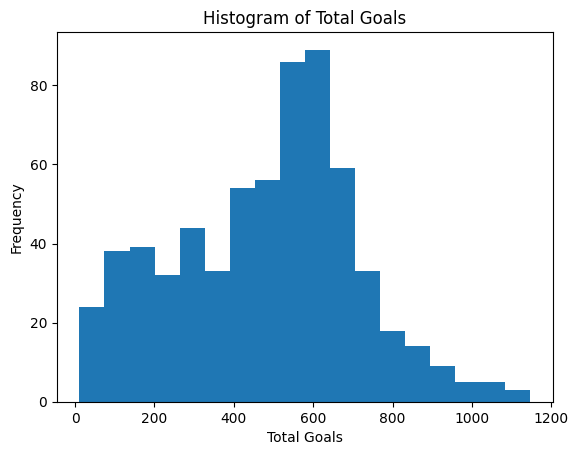

In [101]:
plt.hist(df['total_goals_(2016-2023)'], bins="rice") # Histogram
plt.title('Histogram of Total Goals')
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.show()

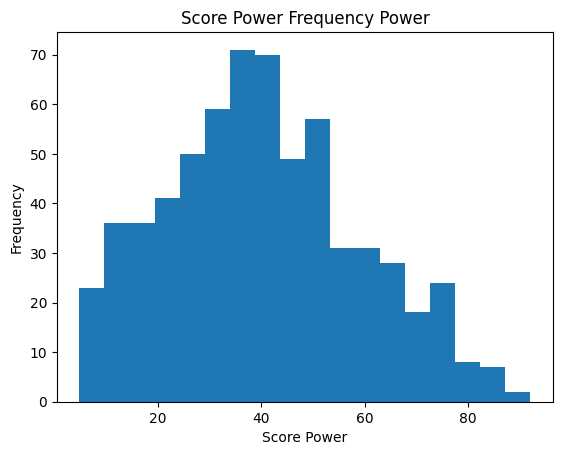

In [102]:
plt.hist(df['spi'], bins="rice") # Histogram
plt.title('Score Power Frequency Power')
plt.xlabel('Score Power')
plt.ylabel('Frequency')
plt.show()

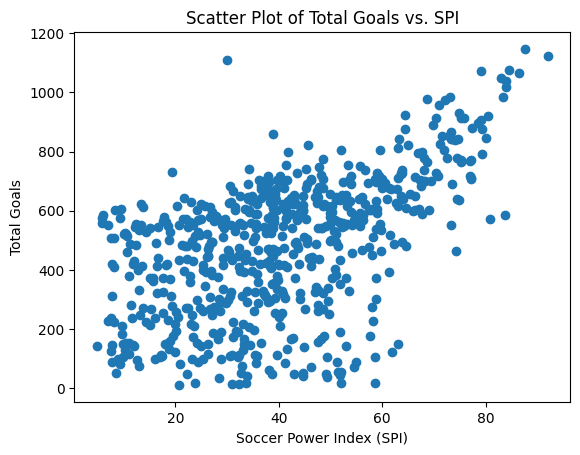

In [103]:
plt.scatter(y_data, x_data)
plt.title('Scatter Plot of Total Goals vs. SPI')
plt.xlabel('Soccer Power Index (SPI)')
plt.ylabel('Total Goals')
plt.show()

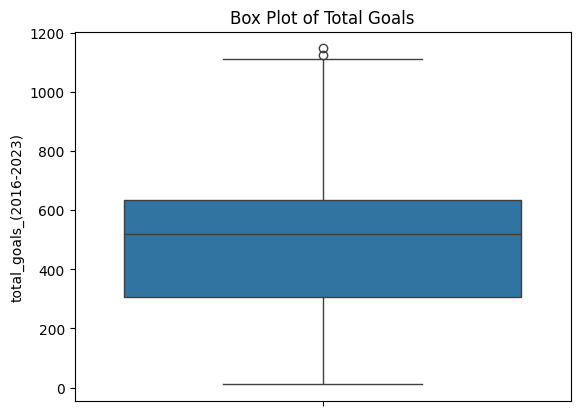

In [104]:
sns.boxplot(x_data)
plt.title('Box Plot of Total Goals')
plt.show()

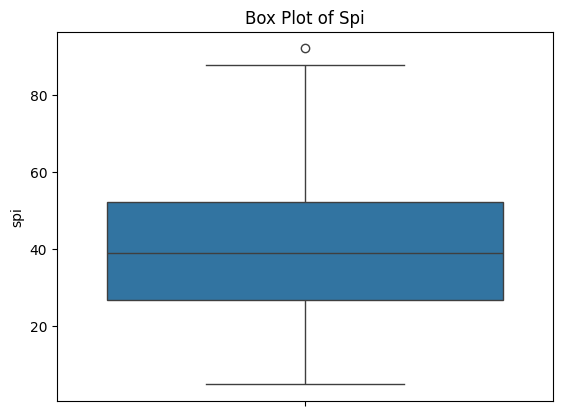

In [105]:
sns.boxplot(y_data)
plt.title('Box Plot of Spi')
plt.show()

In [106]:
# Construct and interpret 
# 95% CI for the population mean
# For value of total_goals
data = x_data
sample_mean = np.mean(data)
sample_std = np.std(data, ddof = 1)
n = len(data) # sample size
confidence_level = 0.95
alpha = 1 - confidence_level

# Confidence Interval 2-side
z_critical = stats.norm.ppf(1 - alpha / 2)
margin_of_error = z_critical * (sample_std / np.sqrt(n))
confidence_interval_2_sides = (sample_mean - margin_of_error, sample_mean + margin_of_error)
# Confidence Interval upper-side
z_critical = stats.norm.ppf(1 - alpha)
margin_of_error = z_critical * (sample_std / np.sqrt(n))
confidence_interval_upper = (float('-inf'),sample_mean + margin_of_error)
# Confidence Interval lower-side
z_critical = stats.norm.ppf(1 - alpha)
margin_of_error = z_critical * (sample_std / np.sqrt(n))
confidence_interval_lower = (sample_mean - margin_of_error,float('+inf'))

# Print the results
print("The interval of 2-sides confidence: ",confidence_interval_2_sides)
print("The interval of upper confidence: ",confidence_interval_upper)
print("The interval of lower confidence: ",confidence_interval_lower)

The interval of 2-sides confidence:  (461.7807866112029, 497.5296658068938)
The interval of upper confidence:  (-inf, 494.65592879039735)
The interval of lower confidence:  (464.65452362769935, inf)


In [107]:
# Construct and interpret 
# 95% CI for the population mean
# For value of total_goals
data = y_data
sample_mean = np.mean(data)
sample_std = np.std(data, ddof = 1)
n = len(data) # sample size
confidence_level = 0.95
alpha = 1 - confidence_level

# Confidence Interval 2-side
z_critical = stats.norm.ppf(1 - alpha / 2)
margin_of_error = z_critical * (sample_std / np.sqrt(n))
confidence_interval_2_sides = (sample_mean - margin_of_error, sample_mean + margin_of_error)
# Confidence Interval upper-side
z_critical = stats.norm.ppf(1 - alpha)
margin_of_error = z_critical * (sample_std / np.sqrt(n))
confidence_interval_upper = (float('-inf'),sample_mean + margin_of_error)
# Confidence Interval lower-side
z_critical = stats.norm.ppf(1 - alpha)
margin_of_error = z_critical * (sample_std / np.sqrt(n))
confidence_interval_lower = (sample_mean - margin_of_error,float('+inf'))

# Print the results
print("The interval of 2-sides confidence: ",confidence_interval_2_sides)
print("The interval of upper confidence: ",confidence_interval_upper)
print("The interval of lower confidence: ",confidence_interval_lower)

The interval of 2-sides confidence:  (38.826963976201014, 41.706639767948744)
The interval of upper confidence:  (-inf, 41.47515192540817)
The interval of lower confidence:  (39.05845181874159, inf)


In [142]:
# Q4 Large-Sample Confidence Interval 
# For a Population Proportion (2-sides, 1-sides)
# Explain your results.
n = 30 # input if requirement
alpha = 0.05 # input if requirement
sample = pd.Series()
count_x = 0


for i in range(x_data.size):
    if x_data[i] > x_data.mean():
        sample.at[count_x] = x_data[i]
        count_x += 1

proportion_value = count_x / n
z_2_side = stats.norm.ppf(1 - alpha / 2)
margin_of_error = z_2_side * ((proportion_value * (1 - proportion_value) / n) ** 0.5) 

confidence_interval_2_sides = (proportion_value - margin_of_error, proportion_value + margin_of_error)
print(confidence_interval_2_sides)

((11.833333333333334-4.051558051643401j), (11.833333333333334+4.051558051643401j))


In [109]:
# Random Sample for y_data (spi)
def y_sample_data(y_data, n):
    random_value_index = np.random.choice(len(y_data), n, replace=False)
    y_sample_data = pd.Series() # Create a series that contain the value
    # Of random value in x_data
    for count, i in enumerate(random_value_index):
        y_sample_data.at[count] = y_data[i]
    return y_sample_data

In [108]:
# Random Sample for x_data (total goals)
def x_sample_data(x_data, n):
    random_value_index = np.random.choice(len(x_data), n, replace=False)
    x_sample_data = pd.Series() # Create a series that contain the value
    # Of random value in x_data
    for count, i in enumerate(random_value_index):
        x_sample_data.at[count] = x_data[i]
    return x_sample_data

641